## Importing Libraries

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Reading the Excel Data

In [3]:
df = pd.read_excel('/content/drive/MyDrive/6119963_2_fifa.xlsx')

In [4]:
data = pd.read_excel('/content/drive/MyDrive/6119963_3_data-dictionary--1-.xlsx')

In [6]:
df.head()

,Unnamed: 0,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Acceleration,Aggression,Agility,Balance,Ball control,Composure,Crossing,Curve,Dribbling,Finishing,Free kick accuracy,GK diving,GK handling,GK kicking,GK positioning,GK reflexes,Heading accuracy,Interceptions,Jumping,Long passing,Long shots,Marking,Penalties,Positioning,Reactions,Short passing,Shot power,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys,CAM,CB,CDM,CF,CM,LAM,LB,LCB,LCM,LDM,LF,LM,LS,LW,LWB,Preferred Positions,RAM,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST
0,0,Cristiano Ronaldo,32,https://cdn.sofifa.org/48/18/players/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Real Madrid CF,https://cdn.sofifa.org/24/18/teams/243.png,95.5M,565K,2228,89,63,89,63,93,95,85,81,91,94,76,7,11,15,14,11,88,29,95,77,92,22,85,95,96,83,94,23,91,92,31,80,85,88,89.0,53.0,62.0,91.0,82.0,89.0,61.0,53.0,82.0,62.0,91.0,89.0,92.0,91.0,66.0,ST LW,89.0,61.0,53.0,82.0,62.0,91.0,89.0,92.0,91.0,66.0,92.0
1,1,L. Messi,30,https://cdn.sofifa.org/48/18/players/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,93,93,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,105M,565K,2154,92,48,90,95,95,96,77,89,97,95,90,6,11,15,14,8,71,22,68,87,88,13,74,93,95,88,85,26,87,73,28,59,90,85,92.0,45.0,59.0,92.0,84.0,92.0,57.0,45.0,84.0,59.0,92.0,90.0,88.0,91.0,62.0,RW,92.0,57.0,45.0,84.0,59.0,92.0,90.0,88.0,91.0,62.0,88.0
2,2,Neymar,25,https://cdn.sofifa.org/48/18/players/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,94,Paris Saint-Germain,https://cdn.sofifa.org/24/18/teams/73.png,123M,280K,2100,94,56,96,82,95,92,75,81,96,89,84,9,9,15,15,11,62,36,61,75,77,21,81,90,88,81,80,33,90,78,24,53,80,83,88.0,46.0,59.0,88.0,79.0,88.0,59.0,46.0,79.0,59.0,88.0,87.0,84.0,89.0,64.0,LW,88.0,59.0,46.0,79.0,59.0,88.0,87.0,84.0,89.0,64.0,84.0
3,3,L. SuÃ¡rez,30,https://cdn.sofifa.org/48/18/players/176580.png,Uruguay,https://cdn.sofifa.org/flags/60.png,92,92,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,97M,510K,2291,88,78,86,60,91,83,77,86,86,94,84,27,25,31,33,37,77,41,69,64,86,30,85,92,93,83,87,38,77,89,45,80,84,88,87.0,58.0,65.0,88.0,80.0,87.0,64.0,58.0,80.0,65.0,88.0,85.0,88.0,87.0,68.0,ST,87.0,64.0,58.0,80.0,65.0,88.0,85.0,88.0,87.0,68.0,88.0
4,4,M. Neuer,31,https://cdn.sofifa.org/48/18/players/167495.png,Germany,https://cdn.sofifa.org/flags/21.png,92,92,FC Bayern Munich,https://cdn.sofifa.org/24/18/teams/21.png,61M,230K,1493,58,29,52,35,48,70,15,14,30,13,11,91,90,95,91,89,25,30,78,59,16,10,47,12,85,55,25,11,61,44,10,83,70,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
data.head()

,Feature,Explanation
0,player index number,NaN
1,Name,name of a player
2,Age,age of a player
3,Photo,picture of player
4,Nationality,player nationality


### Shape of the Data

In [8]:
df.shape

(17981, 74)

## Columns in the Data

In [9]:
df.columns

Index(['Unnamed: 0', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall',
       'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Acceleration', 'Aggression', 'Agility', 'Balance', 'Ball control',
       'Composure', 'Crossing', 'Curve', 'Dribbling', 'Finishing',
       'Free kick accuracy', 'GK diving', 'GK handling', 'GK kicking',
       'GK positioning', 'GK reflexes', 'Heading accuracy', 'Interceptions',
       'Jumping', 'Long passing', 'Long shots', 'Marking', 'Penalties',
       'Positioning', 'Reactions', 'Short passing', 'Shot power',
       'Sliding tackle', 'Sprint speed', 'Stamina', 'Standing tackle',
       'Strength', 'Vision', 'Volleys', 'CAM', 'CB', 'CDM', 'CF', 'CM', 'LAM',
       'LB', 'LCB', 'LCM', 'LDM', 'LF', 'LM', 'LS', 'LW', 'LWB',
       'Preferred Positions', 'RAM', 'RB', 'RCB', 'RCM', 'RDM', 'RF', 'RM',
       'RS', 'RW', 'RWB', 'ST'],
      dtype='object')

### Picking only interested columns

In [10]:
interested_columns =['Name','Age','Nationality','Overall','Potential','Club','Value','Wage','Preferred Positions','ST','RW','LW']

### DataFrame of interested columns

In [11]:
FIFA18 = pd.DataFrame(df,columns=interested_columns)

In [12]:
FIFA18.head() ## showing 5 rows in the fifa 2018 data

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Positions,ST,RW,LW
0,Cristiano Ronaldo,32,Portugal,94,94,Real Madrid CF,95.5M,565K,ST LW,92.0,91.0,91.0
1,L. Messi,30,Argentina,93,93,FC Barcelona,105M,565K,RW,88.0,91.0,91.0
2,Neymar,25,Brazil,92,94,Paris Saint-Germain,123M,280K,LW,84.0,89.0,89.0
3,L. SuÃ¡rez,30,Uruguay,92,92,FC Barcelona,97M,510K,ST,88.0,87.0,87.0
4,M. Neuer,31,Germany,92,92,FC Bayern Munich,61M,230K,GK,NaN,NaN,NaN


In [13]:
FIFA18.dtypes   ##Datatype of all columns in fifa data

Name                    object
Age                      int64
Nationality             object
Overall                  int64
Potential                int64
Club                    object
Value                   object
Wage                    object
Preferred Positions     object
ST                     float64
RW                     float64
LW                     float64
dtype: object

###  rank ordered list of top 10 countries with most players

In [14]:
FIFA18["Nationality"].value_counts().head(10)

England        1630
Germany        1140
Spain          1019
France          978
Argentina       965
Brazil          812
Italy           799
Colombia        592
Japan           469
Netherlands     429
Name: Nationality, dtype: int64

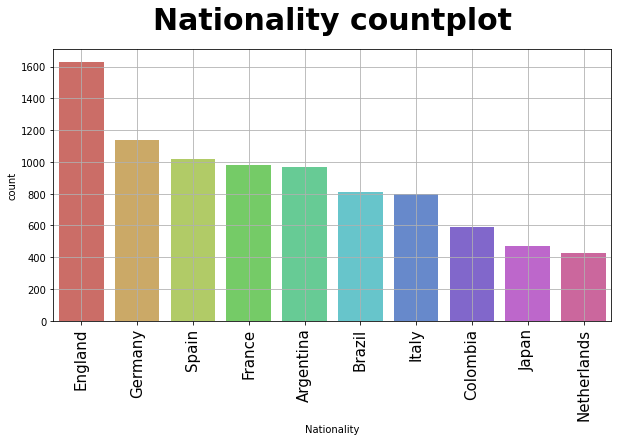

In [15]:
plt.figure(figsize=(10,5))
sns.countplot(x='Nationality',data=FIFA18,order=FIFA18.Nationality.value_counts().iloc[:10].index,palette="hls")
plt.title('Nationality countplot',fontsize=30, fontweight='bold', y=1.05,)
plt.grid(zorder=0)

N=10
ind=np.arange(N)
s=(FIFA18['Nationality'].value_counts().index)
plt.xticks(ind,s,rotation='vertical', fontsize=15)
plt.show()


#### Conclusion:
1) we can see England have more players as compared other countries.<br>
2) England, Germany, spain,France,Argentina top 5 countries have more players.


### Age distribution of the Players

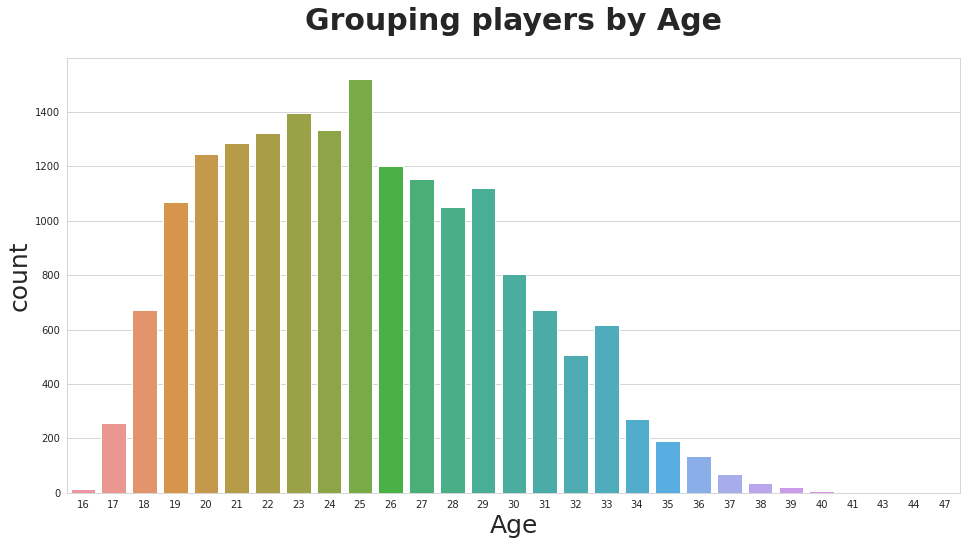

In [16]:
plt.figure(figsize=(16,8))
sns.set_style("whitegrid")
plt.title('Grouping players by Age', fontsize=30, fontweight='bold', y=1.05,)
plt.xlabel('Number of players', fontsize=25)
plt.ylabel('Players Age', fontsize=25)
sns.countplot(x="Age", data=FIFA18);
plt.show()


#### Age distribution of player’s who participated in FIFA 2018<br>
1)As the above graph shows that most players are from 18 to 33 means: — most players are from 18 to 33. <br>
2)In football, most players have come at the age of 18 and they retire at the age of 33. Here we can see that as well as player’s age is increasing there performance is increasing but after a certain time it started to decreasing so, here is some exception we can see that at the age of 33 compared to 32 player’s no. of age is increased. <br>
3)In the age of 16 footballers started playing but after 44 they stop playing <br>
4)<b><I> after 34 their performance started decreasing.</I></b>

In [17]:
FIFA18['Position'] = FIFA18['Preferred Positions'].str.split().str[0]

In [18]:
def str2number(amount):
    if type(amount) == int:
        return amount
    
    if amount[-1] == 'M':
        d = float(amount[:-1])
        
        return d*1000000
    elif amount[-1] == 'K':
        d = float(amount[:-1])
        return d*1000
    else:
        d = float(amount[:])
        return d
    
FIFA18['ValueNum'] = FIFA18['Value'].apply(lambda x: str2number(x))
FIFA18['WageNum'] = FIFA18['Wage'].apply(lambda x: str2number(x))

### Scatterplot of the striker, the right-winger, or the left-winger

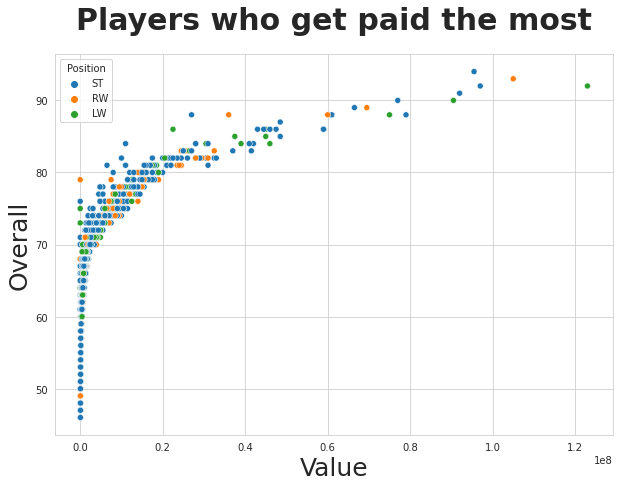

In [19]:
plt.figure(figsize=(10,7))
# sns.set_style("whitegrid")
plt.title('Players who get paid the most', fontsize=30, fontweight='bold', y=1.05,)
plt.xlabel('Value', fontsize=25)
plt.ylabel('Overall', fontsize=25)
sns.scatterplot(x='ValueNum', y='Overall', hue='Position', data=FIFA18.loc[FIFA18['Position'].isin(['ST', 'RW', 'LW'])])
plt.show()

#### Conclusion:
1) We can see Left winger gets paid the most after that right winger then striker.

### Top 5 players for every preferred position in terms of overall as well as potential points

In [20]:
sorted_players = FIFA18.sort_values(["Overall",'Potential'], ascending=False).head(20)

In [21]:
players = sorted_players[["Name" ,"Age" ,"Nationality" ,"Overall" ,"Potential" ,"Position" ,"WageNum"]].values

In [22]:
players = pd.DataFrame(players,columns=["Name" ,"Age" ,"Nationality" ,"Overall" ,"Potential","Position" ,"Wage"])

In [23]:
players.head(5)

,Name,Age,Nationality,Overall,Potential,Position,Wage
0,Cristiano Ronaldo,32,Portugal,94,94,ST,565000
1,L. Messi,30,Argentina,93,93,RW,565000
2,Neymar,25,Brazil,92,94,LW,280000
3,L. SuÃ¡rez,30,Uruguay,92,92,ST,510000
4,M. Neuer,31,Germany,92,92,GK,230000


###  which club have the maximum share of players from England?

In [24]:
only_england = FIFA18[FIFA18['Nationality']=='England']

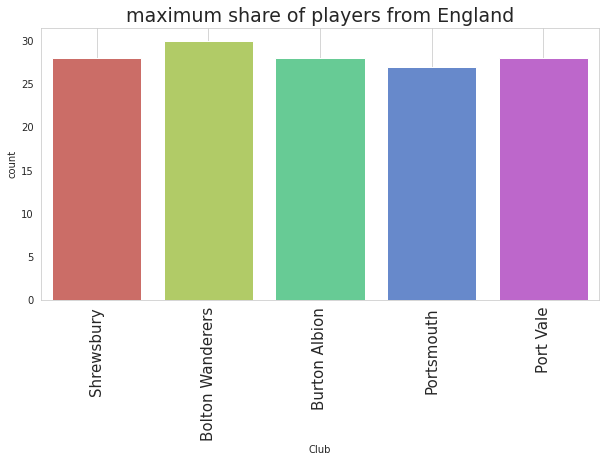

In [25]:
# only_england['Club'].value_counts()
plt.figure(figsize=(10,5))
sns.countplot(x='Club',data=FIFA18,order=only_england.Club.value_counts().iloc[:5].index,palette="hls")
plt.title('maximum share of players from England',fontsize=19)
plt.grid()

N=5
ind=np.arange(N)
s=(only_england['Club'].value_counts().index)
plt.xticks(ind,s,rotation='vertical',fontsize=15)
plt.show()


<B><I>Bolton Wanderers club(s)</I></B> have the maximum share of players from England

### Which club(s) have the maximum share of players from Spain?

In [26]:
only_Spain = FIFA18[FIFA18['Nationality']=='Spain']

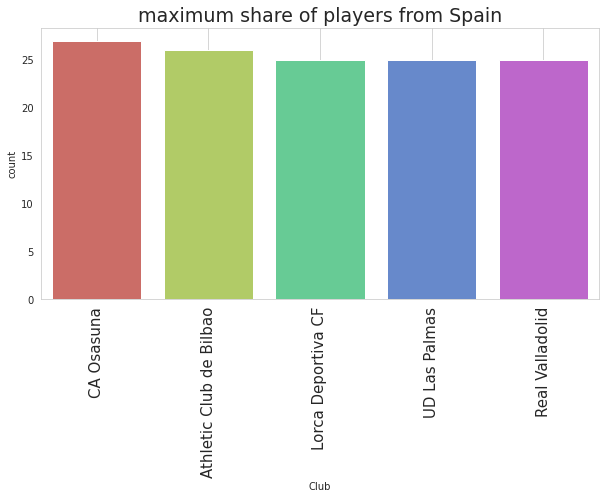

In [27]:
plt.figure(figsize=(10,5))
sns.countplot(x='Club',data=only_Spain,order=only_Spain.Club.value_counts().iloc[:5].index,palette="hls")
plt.title('maximum share of players from Spain',fontsize=19)
plt.grid()

N=5
ind=np.arange(N)
s=(only_Spain['Club'].value_counts().index)
plt.xticks(ind,s,rotation='vertical',fontsize=15)

plt.show()

<b><I>CA Osasuna</I></b> have the maximum share of players from Spain

### Which club(s) have the maximum share of players from Germany?

In [28]:
only_Germany = FIFA18[FIFA18['Nationality']=='Germany']

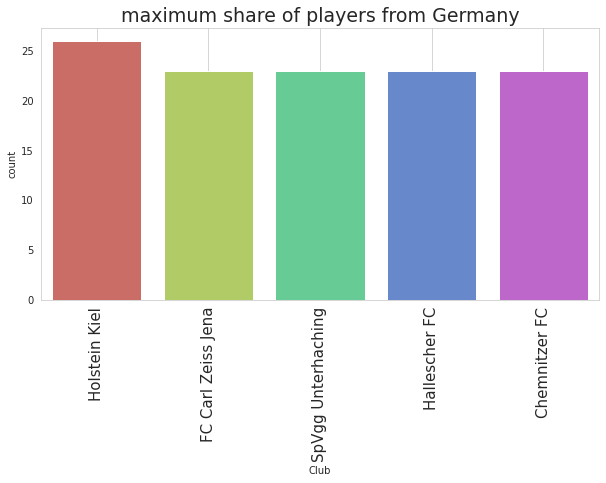

In [29]:
plt.figure(figsize=(10,5))
sns.countplot(x='Club',data=only_Germany,order=only_Germany.Club.value_counts().iloc[:5].index,palette="hls")
plt.title('maximum share of players from Germany',fontsize=19)
plt.grid()

N=5
ind=np.arange(N)
s=(only_Germany['Club'].value_counts().index)
plt.xticks(ind,s,rotation='vertical',fontsize=15)
plt.show()

<b><I> Holstein Kiel </I> </b>  have the maximum share of players from Germany

In [30]:
FIFA18[FIFA18['Overall']>=75]

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Positions,ST,RW,LW,Position,ValueNum,WageNum
0,Cristiano Ronaldo,32,Portugal,94,94,Real Madrid CF,95.5M,565K,ST LW,92.0,91.0,91.0,ST,95500000.0,565000.0
1,L. Messi,30,Argentina,93,93,FC Barcelona,105M,565K,RW,88.0,91.0,91.0,RW,105000000.0,565000.0
2,Neymar,25,Brazil,92,94,Paris Saint-Germain,123M,280K,LW,84.0,89.0,89.0,LW,123000000.0,280000.0
3,L. SuÃ¡rez,30,Uruguay,92,92,FC Barcelona,97M,510K,ST,88.0,87.0,87.0,ST,97000000.0,510000.0
4,M. Neuer,31,Germany,92,92,FC Bayern Munich,61M,230K,GK,NaN,NaN,NaN,GK,61000000.0,230000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2036,C. PavÃ³n,21,Argentina,75,84,Boca Juniors,10.5M,20K,ST RM RW,71.0,75.0,75.0,ST,10500000.0,20000.0
2037,C. Villanueva,31,Chile,75,75,Al Ittihad,6M,36K,CM CAM,66.0,72.0,72.0,CM,6000000.0,36000.0
2038,G. Donsah,21,Ghana,75,83,Bologna,10M,36K,CM,69.0,74.0,74.0,CM,10000000.0,36000.0
2039,A. Aquilani,32,Italy,75,75,UD Las Palmas,5M,20K,CDM CM,69.0,71.0,71.0,CDM,5000000.0,20000.0


Mentioned Countrie - France, England, Spain, Italy and Germany
Now form the best team for each of the mentioned countries and compare them

In [31]:
def get_best_squad(formation):
    FIFA18_copy = FIFA18.copy()
    store = []
    
    # iterate through all positions in the input formation and get players with highest overall respective to the position
    for i in formation:
        store.append([
            i,
            FIFA18_copy.loc[[FIFA18_copy[FIFA18_copy['Position'] == i]['Overall'].idxmax()]]['Name'].to_string(index = False),
            FIFA18_copy[FIFA18_copy['Position'] == i]['Overall'].max(),
            FIFA18_copy.loc[[FIFA18_copy[FIFA18_copy['Position'] == i]['Overall'].idxmax()]]['Age'].to_string(index = False),
            FIFA18_copy.loc[[FIFA18_copy[FIFA18_copy['Position'] == i]['Overall'].idxmax()]]['Club'].to_string(index = False),
            FIFA18_copy.loc[[FIFA18_copy[FIFA18_copy['Position'] == i]['Overall'].idxmax()]]['Value'].to_string(index = False),
            FIFA18_copy.loc[[FIFA18_copy[FIFA18_copy['Position'] == i]['Overall'].idxmax()]]['Wage'].to_string(index = False)
        ])
                      
        FIFA18_copy.drop(FIFA18_copy[FIFA18_copy['Position'] == i]['Overall'].idxmax(), 
                         inplace = True)
    
    # return store with only necessary columns
    return pd.DataFrame(np.array(store).reshape(11,7), 
                        columns = ['Position', 'Player', 'Overall', 'Age', 'Club', 'Value', 'Wage']).to_string(index = False)

In [82]:
def get_best_squad_n(formation, nationality, measurement = 'Overall'):
    FIFA18_copy = FIFA18.copy()
    FIFA18_copy = FIFA18_copy[FIFA18_copy['Nationality'] == nationality]
    store = []
    
    for i in formation:
        store.append([
            FIFA18_copy.loc[[FIFA18_copy[FIFA18_copy['Position'].str.contains(i)][measurement].idxmax()]]['Position'].to_string(index = False),
            FIFA18_copy.loc[[FIFA18_copy[FIFA18_copy['Position'].str.contains(i)][measurement].idxmax()]]['Name'].to_string(index = False), 
            FIFA18_copy[FIFA18_copy['Position'].str.contains(i)][measurement].max(),
            FIFA18_copy.loc[[FIFA18_copy[FIFA18_copy['Position'].str.contains(i)][measurement].idxmax()]]['Age'].to_string(index = False),
            FIFA18_copy.loc[[FIFA18_copy[FIFA18_copy['Position'].str.contains(i)][measurement].idxmax()]]['Club'].to_string(index = False),
            FIFA18_copy.loc[[FIFA18_copy[FIFA18_copy['Position'].str.contains(i)][measurement].idxmax()]]['Value'].to_string(index = False),
            FIFA18_copy.loc[[FIFA18_copy[FIFA18_copy['Position'].str.contains(i)][measurement].idxmax()]]['Wage'].to_string(index = False)
        ])
        
        FIFA18_copy.drop(FIFA18_copy[FIFA18_copy['Position'].str.contains(i)][measurement].idxmax(), 
                         inplace = True)
    
    return np.mean([x[2] for x in store]).round(2), pd.DataFrame(np.array(store).reshape(11,7), 
                                                                 columns = ['Position', 'Player', measurement, 'Age', 'Club', 'Value', 'Wage']).to_string(index = False)

In [83]:

def get_summary_n(squad_list, squad_name, nationality_list):
    summary = []

    for i in nationality_list:
        count = 0
        for j in squad_list:
            
            # for overall rating
            O_temp_rating, _  = get_best_squad_n(formation = j, nationality = i, measurement = 'Overall')
            
            # for potential rating & corresponding value
            P_temp_rating, _ = get_best_squad_n(formation = j, nationality = i, measurement = 'Potential')
            
            summary.append([i, squad_name[count], O_temp_rating.round(2), P_temp_rating.round(2)])    
            count += 1
    
    return summary

In [99]:
squad_433_strict = ['GK', 'RB|RWB', 'CB', 'CB', 'LB|LWB', 'RM|CM',  'CDM|CM|CAM', 'LM|CM', 'RW|ST',  'ST|CF', 'LW|ST']

In [100]:
squad_list = [squad_433_strict]
squad_name = ['4-3-3']

For France

In [101]:
France = pd.DataFrame(np.array(get_summary_n(squad_list, squad_name, ['France'])).reshape(-1,4), columns = ['Nationality', 'Squad', 'Overall', 'Potential'])
France.set_index('Nationality', inplace = True)
France[['Overall', 'Potential']] = France[['Overall', 'Potential']].astype(float)

print (France)

             Squad  Overall  Potential
Nationality                           
France       4-3-3    84.91      90.18


In [102]:
rating_433_FR_Overall_, best_list_433_FR_Overall = get_best_squad_n(squad_433_strict, 'France', 'Overall')
print('-Overall-')
print('Average rating: {:.1f}'.format(rating_433_FR_Overall_))
print(best_list_433_FR_Overall)

-Overall-
Average rating: 84.9
Position         Player Overall  Age                      Club   Value   Wage
      GK      H. Lloris      88   30         Tottenham Hotspur     38M   165K
      RB       K. Zouma      79   22                Stoke City     15M    96K
      CB      R. Varane      85   24            Real Madrid CF   46.5M   175K
      CB     A. Laporte      84   23   Athletic Club de Bilbao   35.5M    36K
      LB     L. Kurzawa      80   24       Paris Saint-Germain   16.5M    69K
      CM      N. KantÃ©      87   26                   Chelsea   52.5M   190K
     CDM       P. Pogba      87   24         Manchester United   66.5M   195K
      CM     B. Matuidi      85   30                  Juventus   28.5M   145K
      ST     K. Benzema      86   29            Real Madrid CF   44.5M   295K
      ST   A. Lacazette      85   26                   Arsenal   48.5M   180K
      LW   A. Griezmann      88   26          AtlÃ©tico Madrid     75M   150K


Germany

In [103]:
Germany = pd.DataFrame(np.array(get_summary_n(squad_list, squad_name, ['Germany'])).reshape(-1,4), columns = ['Nationality', 'Squad', 'Overall', 'Potential'])
Germany.set_index('Nationality', inplace = True)
Germany[['Overall', 'Potential']] = Germany[['Overall', 'Potential']].astype(float)

print (Germany)

             Squad  Overall  Potential
Nationality                           
Germany      4-3-3     86.0      88.36


In [104]:
rating_433_GER_Overall, best_list_433_GER_Overall = get_best_squad_n(squad_433_strict, 'Germany', 'Overall')
print('-Overall-')
print('Average rating: {:.1f}'.format(rating_433_GER_Overall))
print(best_list_433_GER_Overall)

-Overall-
Average rating: 86.0
Position         Player Overall  Age                  Club   Value   Wage
      GK       M. Neuer      92   31      FC Bayern Munich     61M   230K
      RB    A. RÃ¼diger      82   24               Chelsea   24.5M   105K
      CB     J. Boateng      88   28      FC Bayern Munich     48M   215K
      CB     M. Hummels      88   28      FC Bayern Munich     48M   215K
      LB      J. Hector      80   27           1. FC KÃ¶ln     14M    42K
      RM   K. Bellarabi      82   27   Bayer 04 Leverkusen     23M    67K
     CDM       T. Kroos      90   27        Real Madrid CF     79M   340K
      LM     J. Draxler      84   23   Paris Saint-Germain   39.5M   120K
      RW       M. Ã–zil      88   28               Arsenal     60M   265K
      ST     T. MÃ¼ller      86   27      FC Bayern Munich   47.5M   190K
      LW        M. Reus      86   28     Borussia Dortmund     45M   120K


Spain

In [105]:
Spain = pd.DataFrame(np.array(get_summary_n(squad_list, squad_name, ['Spain'])).reshape(-1,4), columns = ['Nationality', 'Squad', 'Overall', 'Potential'])
Spain.set_index('Nationality', inplace = True)
Spain[['Overall', 'Potential']] = Spain[['Overall', 'Potential']].astype(float)

print (Spain)

             Squad  Overall  Potential
Nationality                           
Spain        4-3-3    86.45      89.36


In [106]:
rating_4231_ESP_Overall, best_list_4231_ESP_Overall = get_best_squad_n(squad_433_strict, 'Spain', 'Overall')
print('-Overall-')
print('Average rating: {:.1f}'.format(rating_4231_ESP_Overall))
print(best_list_4231_ESP_Overall)

-Overall-
Average rating: 86.5
Position            Player Overall  Age                Club   Value   Wage
      GK            De Gea      90   26   Manchester United   64.5M   215K
      RB          Carvajal      84   25      Real Madrid CF     32M   195K
      CB      Sergio Ramos      90   31      Real Madrid CF     52M   310K
      CB            PiquÃ©      87   30        FC Barcelona   37.5M   240K
      LB        Jordi Alba      85   28        FC Barcelona   30.5M   215K
      CM   Sergio Busquets      86   28        FC Barcelona     36M   250K
     CDM            Thiago      88   26    FC Bayern Munich   70.5M   225K
      LM       David Silva      87   31     Manchester City     44M   220K
      ST       Diego Costa      86   28             Chelsea     46M   235K
      ST            Morata      84   24             Chelsea     41M   170K
      LW     Marco Asensio      84   21      Real Madrid CF     46M   175K


England

In [107]:
England = pd.DataFrame(np.array(get_summary_n(squad_list, squad_name, ['England'])).reshape(-1,4), columns = ['Nationality', 'Squad', 'Overall', 'Potential'])
England.set_index('Nationality', inplace = True)
England[['Overall', 'Potential']] = England[['Overall', 'Potential']].astype(float)

print (England)

             Squad  Overall  Potential
Nationality                           
England      4-3-3    82.73       87.0


In [108]:
rating_433_ENG_Overall, best_list_433_ENG_Overall = get_best_squad_n(squad_433_strict, 'England', 'Overall')
print('-Overall-')
print('Average rating: {:.1f}'.format(rating_433_ENG_Overall))
print(best_list_433_ENG_Overall)

-Overall-
Average rating: 82.7
Position         Player Overall  Age                Club   Value   Wage
      GK        J. Hart      82   30     West Ham United     14M   110K
     RWB      K. Walker      83   27     Manchester City     24M   130K
      CB      G. Cahill      84   31             Chelsea     21M   160K
      CB       M. Keane      81   24             Everton     21M    91K
     LWB        D. Rose      82   26   Tottenham Hotspur     21M    99K
      CM     A. Lallana      83   29           Liverpool     25M   135K
      CM        E. Dier      82   23   Tottenham Hotspur     25M    85K
      LM        D. Alli      84   21   Tottenham Hotspur     43M   115K
      ST        H. Kane      86   23   Tottenham Hotspur     59M   165K
      ST   D. Sturridge      82   27           Liverpool   23.5M   140K
      ST       J. Vardy      81   30      Leicester City     17M    89K


Italy

In [109]:
Italy = pd.DataFrame(np.array(get_summary_n(squad_list, squad_name, ['Italy'])).reshape(-1,4), columns = ['Nationality', 'Squad', 'Overall', 'Potential'])
Italy.set_index('Nationality', inplace = True)
Italy[['Overall', 'Potential']] = Italy[['Overall', 'Potential']].astype(float)

print (Italy)

             Squad  Overall  Potential
Nationality                           
Italy        4-3-3     84.0       88.0


In [110]:
rating_433_Italy_Overall, best_list_433_Italy_Overall = get_best_squad_n(squad_433_strict, 'Italy', 'Overall')
print('-Overall-')
print('Average rating: {:.1f}'.format(rating_433_Italy_Overall))
print(best_list_433_Italy_Overall)

-Overall-
Average rating: 84.0
Position            Player Overall  Age                  Club   Value   Wage
      GK         G. Buffon      89   39              Juventus    4.5M   110K
      RB        M. Darmian      80   27     Manchester United   13.5M   120K
      CB      G. Chiellini      89   32              Juventus     38M   225K
      CB        L. Bonucci      88   30                 Milan     44M   210K
      LB           Emerson      76   22                  Roma    8.5M    48K
      CM       A. Florenzi      82   26                  Roma     22M    73K
     CDM       M. Verratti      87   24   Paris Saint-Germain   64.5M   130K
      LM   F. Bernardeschi      82   23              Juventus   30.5M   110K
      ST        A. Belotti      83   23                Torino     37M    58K
      ST       S. Giovinco      83   30            Toronto FC     25M    15K
      LW        L. Insigne      85   26                Napoli     45M   115K


Final Comparison on the basis of above best team 

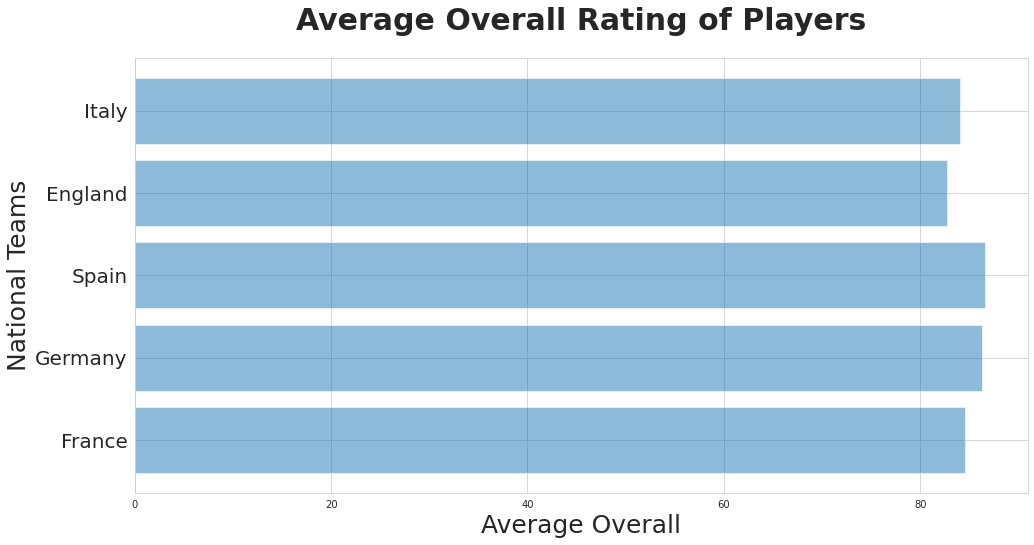

In [111]:
teams = ('France', 'Germany', 'Spain', 'England', 'Italy')
index = np.arange(len(teams))
average_overall = [84.6, 86.3, 86.6, 82.7, 84.1]

plt.figure(figsize=(16,8))
plt.barh(index, average_overall, align='center', alpha=0.5)
plt.yticks(index, teams, fontsize=20)
plt.ylabel('National Teams', fontsize=25)
plt.xlabel('Average Overall', fontsize=25)
plt.title('Average Overall Rating of Players', fontsize=30, fontweight='bold', y=1.05,)
 
plt.show()

On the Basis of above chart we can say that Average Overall Rating of players of team : 
Spain is highest and followed by Germany and Italy.